Part 1: Regression Problem

You are required to build a deep neural network model to predict the median value of owner-occupied homes in thousands of dollars (target variable) using the given features in the dataset.  

Load the Boston Housing dataset from the Keras library. - done with california dataset
Explore and preprocess the data (e.g., normalization, one-hot encoding, etc.).  
Split the data into training and testing sets.  
Define a deep neural network architecture for regression using Keras.  
Train the model on the training set and evaluate its performance on the testing set.  
Tune the hyperparameters of the model to achieve better performance (e.g., number of hidden layers, activation functions, learning rate, number of epochs, etc.).  
Compare the performance of the tuned model with the baseline model (i.e., the initial model without any hyperparameter tuning).  

Part 2: Classification Problem  

You are required to build a deep neural network model to classify whether a given house is expensive (1) or not (0) based on the given features in the dataset.  

Follow the steps below:  

Load the Boston Housing dataset from the Keras library.  
Explore and preprocess the data (e.g., normalization, one-hot encoding, etc.).  
Convert the target variable into a binary variable (i.e., expensive or not expensive).  
Split the data into training and testing sets.  
Define a deep neural network architecture for classification using Keras.  
Train the model on the training set and evaluate its performance on the testing set.  
Tune the hyperparameters of the model to achieve better performance (e.g., number of hidden layers, activation functions, learning rate, number of epochs, etc.).  
Compare the performance of the tuned model with the baseline model (i.e., the initial model without any hyperparameter tuning).  

In [99]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

print(keras.__version__)

3.4.1


In [172]:
# download the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.california_housing.load_data(
    version="small", path="california_housing.npz", test_split=0.2, seed=113
)

It's a continuous regression dataset with 600 (20,640 for large) samples with 8 features each.

Target variable is a scalar: the median house value for California districts, in dollars.

8 input features:  

MedInc: median income in block group  
HouseAge: median house age in block group  
AveRooms: average number of rooms per household  
AveBedrms: average number of bedrooms per household  
Population: block group population  
AveOccup: average number of household members  
Latitude: block group latitude  
Longitude: block group longitude  

### EDA

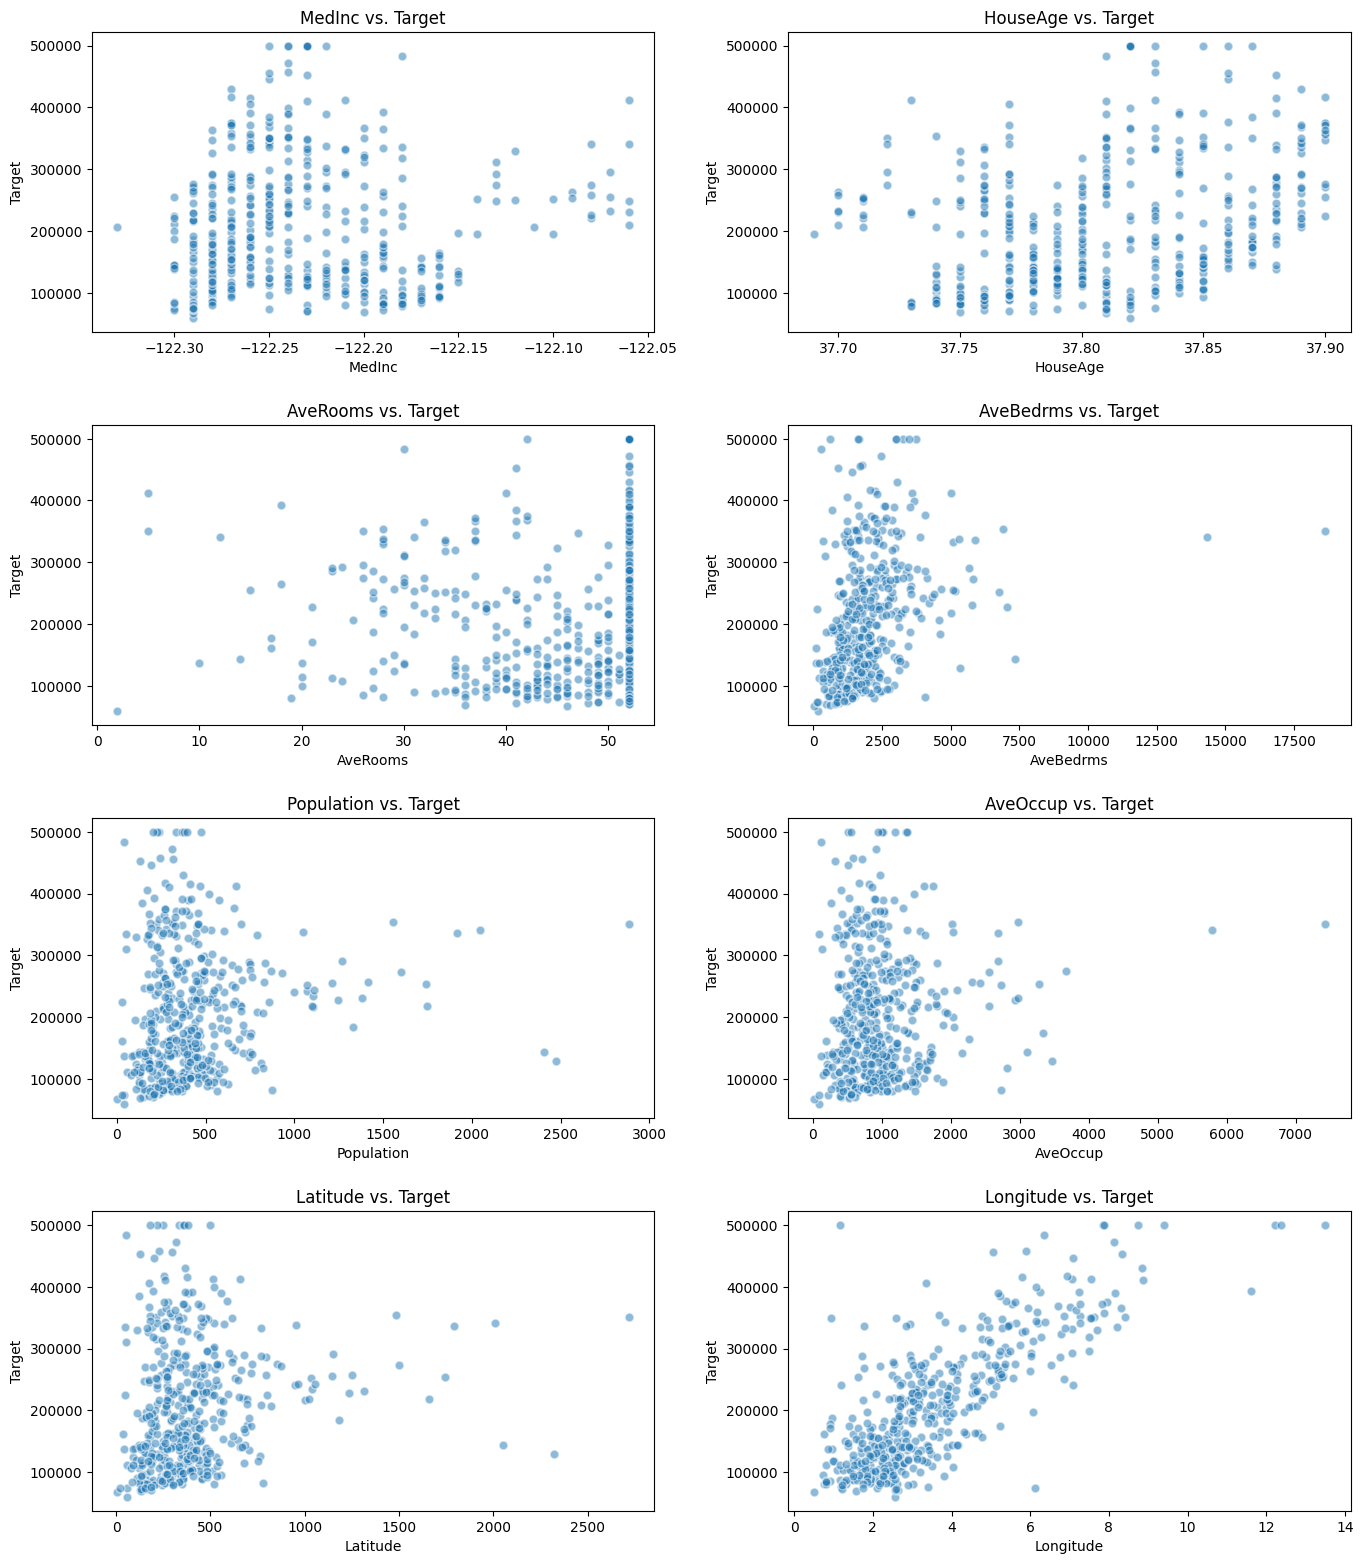

In [127]:
feature_names = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16), sharex=False, sharey=False)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature vs. target
for i, ax in enumerate(axes):
    ax.scatter(x_train[:, i], y_train, alpha=0.5, edgecolors='w', s=40)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Target')
    ax.set_title(f'{feature_names[i]} vs. Target')

# Adjust layout to improve readability of x-axis labels
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()

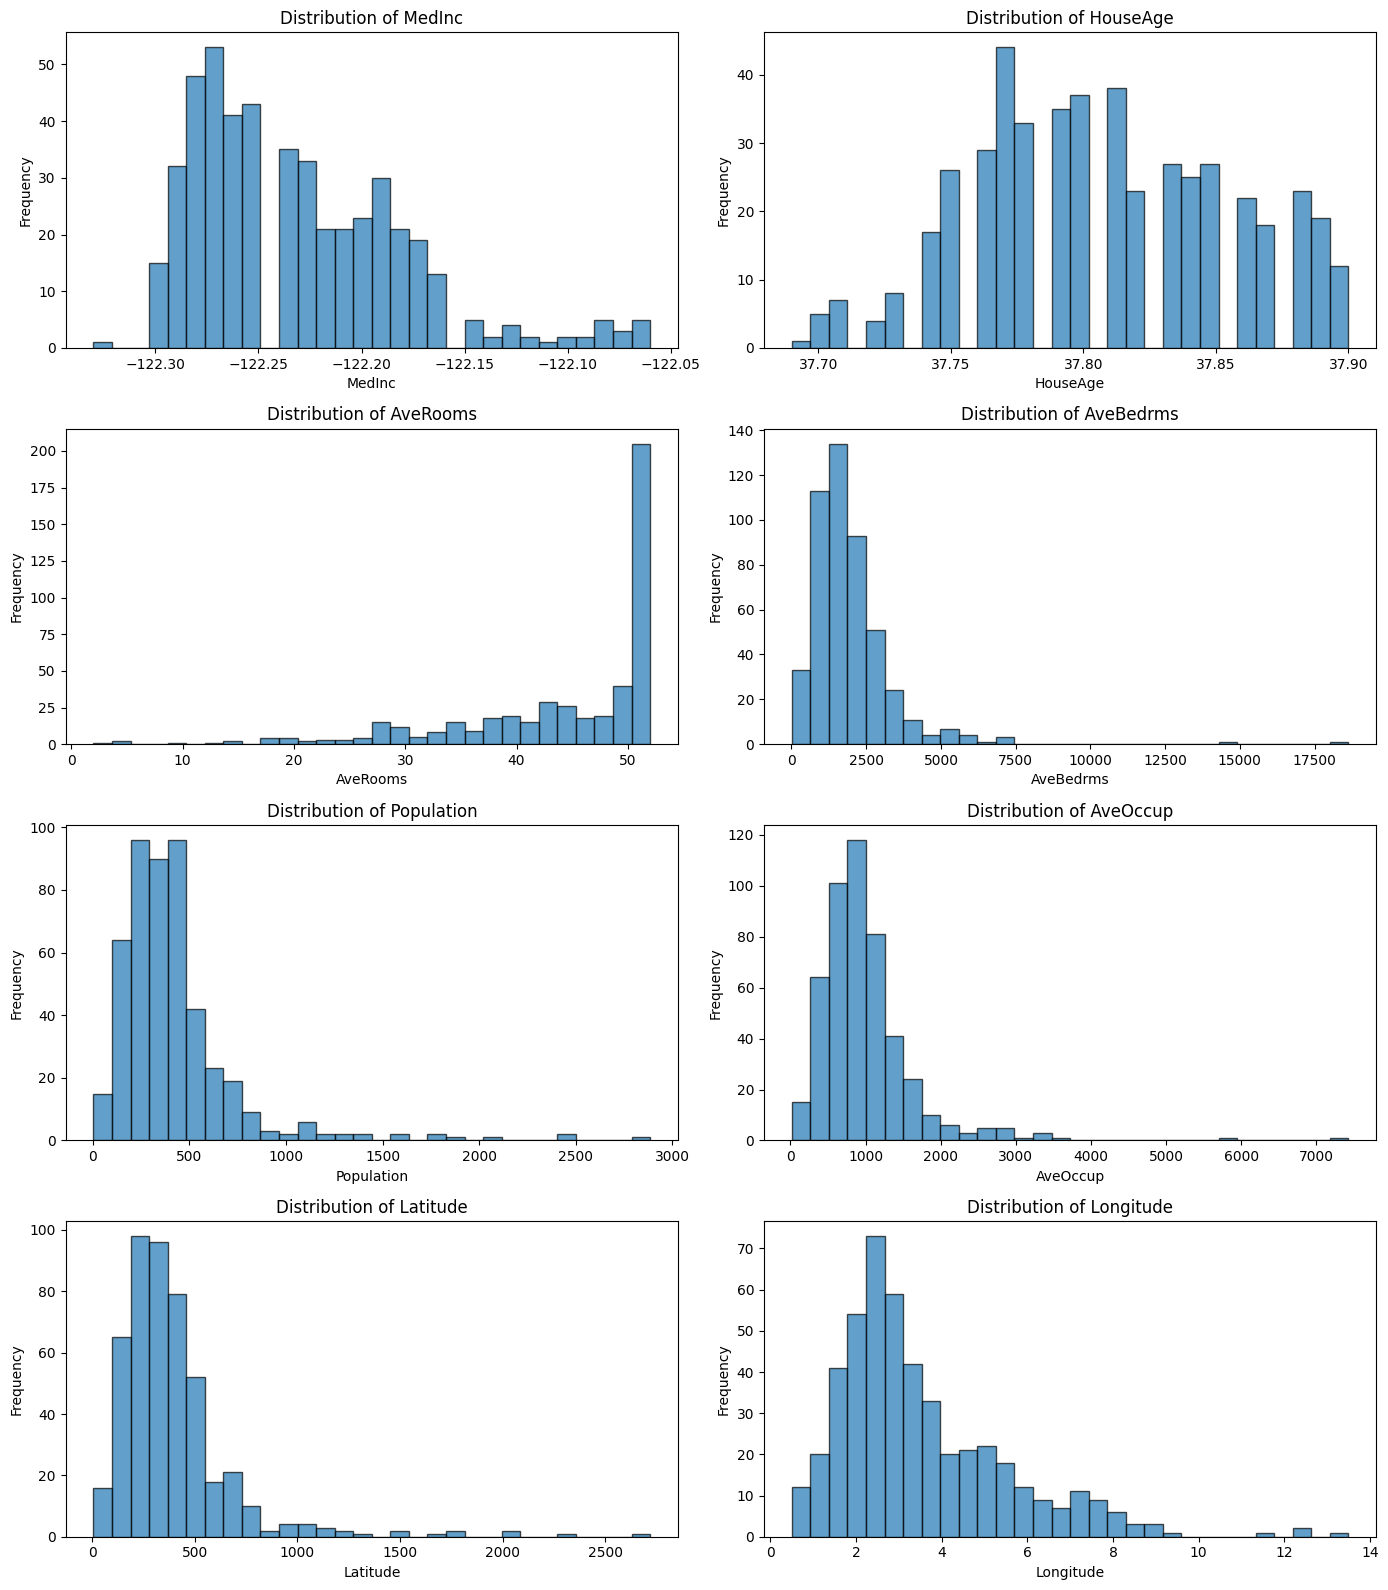

In [142]:
# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the distribution of each feature
for i, ax in enumerate(axes):
    ax.hist(x_train[:, i], bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature_names[i]}')

# Adjust layout to improve readability
plt.tight_layout()

# Display the plot
plt.show()

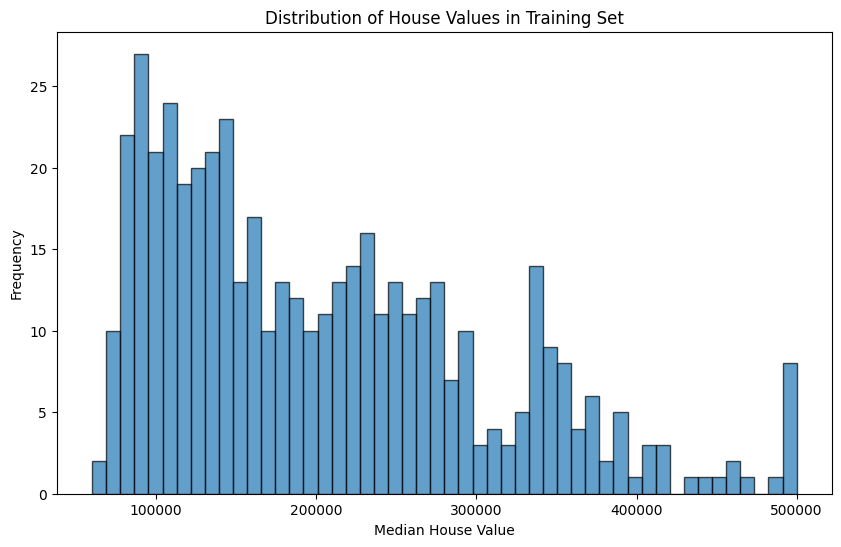

In [16]:
# Distribution of target variables
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of House Values in Training Set')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

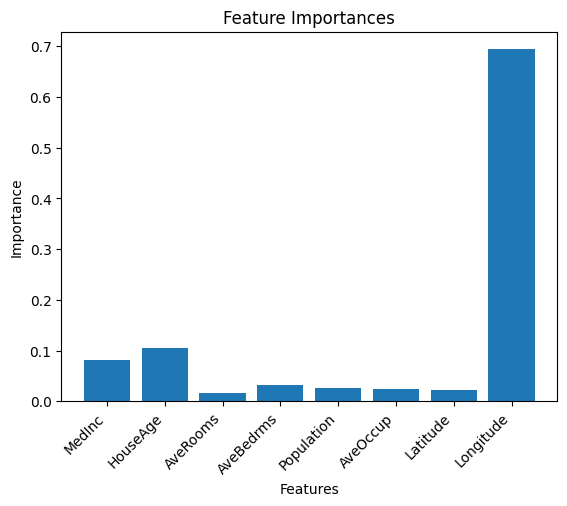

In [141]:
# Understand feature importance statistically
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

plt.bar(range(len(importances)), importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')

# Adding x-ticks with feature names for clarity
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
plt.show()

### Regression

In [ ]:
# define model
def create_regression_model(train_data): 
    normalizer = Normalization(axis=-1)
    # Fit the Normalization layer on the training data
    normalizer.adapt(train_data)

    model = Sequential([
        normalizer,
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    return model

model = create_regression_model(x_test)

In [139]:
# scale target variables because loss was too large
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1))

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train_scaled, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test_scaled)
print(f"Test Loss: {loss}")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1594 - val_loss: 0.0706
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0854 - val_loss: 0.0446
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0585 - val_loss: 0.0389
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0393 - val_loss: 0.0323
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0328 - val_loss: 0.0244
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0223 - val_loss: 0.0226
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0184 - val_loss: 0.0235
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - val_loss: 0.0230
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - val_loss: 0.0214
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0176 - val_loss: 0.0199
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160 - val_loss: 0.0192
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - val_loss: 0.0194
Epoch 13/50


In [140]:
# predict model results
y_pred_scaled = model.predict(x_test)

# Inverse the predictions from scaled to orignal values
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_orig = target_scaler.inverse_transform(y_test_scaled)

# Performing model metrics
mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)
explained_variance = explained_variance_score(y_test_orig, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print(f"Explained Variance Score: {explained_variance}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Mean Absolute Error (MAE): 34319.66015625
Mean Squared Error (MSE): 3346822912.0
Root Mean Squared Error (RMSE): 57851.73046875
R-squared (R2): 0.6752829551696777
Explained Variance Score: 0.6822619438171387


#### Comparing to base model

For preprocessing, I used a RandomForestRegressor to obtain a statistical importance on the features in this dataset. There was one that stood out and two features that followed in importance but i decided to keep all the features since the dataset was limited. 

What i started to notice was adding more dropout layers hurt model performance. Adding more Dense layers did seem to help improve it from the base model. Also having a higher learning rate improved the models MAE. Messing around with the number batch size and layer's neurons did help improve the model. 

I was satisfied with the loss when evaluating the model as well as the MAE, as it has improved by hyper parameter tuning. The mean squared error is an issue and this model defintely has room for improvement. One of the causes is due to the outliers, so those could be removed with more time. Another thing I continue to learn is that after scaling the inputs, I also need to inverse transform the scaled test results. 

Further work would involve removing some of the least significant features, and outliers to improve perforamce results. 

### Classification

In [143]:
# Defining the model threshold
train_threshold = np.mean(y_train)
test_threshold = np.mean(y_test)
both_threshold = np.mean(np.concatenate((y_test, y_train)))
print("threshold for expensive homes in test datasets", test_threshold)
print("threshold for expensive homes in train datasets", train_threshold)

# Convert y_train and y_test to binary values
y_train_binary = (y_train > both_threshold).astype(int)
y_test_binary = (y_test > both_threshold).astype(int)

threshold for expensive homes in test datasets 196155.02
threshold for expensive homes in train datasets 204178.56


In [ ]:
# function for creating a model
def create_housing_classification_model(x_train):

    # Create the Normalization layer
    normalizer = Normalization(axis=-1)
    normalizer.adapt(x_train)  # Fit on training data

    # Define the model for binary classification
    model = Sequential([
        normalizer,
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
    ])

    # Compile the model with binary_crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy', tf.keras.metrics.Recall(thresholds=0), tf.keras.metrics.Precision(thresholds=0)])

    return model

model = create_regression_model(x_test)

In [170]:
# Setting up early stopping during training for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train_binary, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate loss
loss = model.evaluate(x_test, y_test_binary)
print(f"Test Loss: {loss}")

Epoch 1/50


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3850 - val_loss: 0.2624
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2420 - val_loss: 0.1605
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1823 - val_loss: 0.1538
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1782 - val_loss: 0.1457
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1441 - val_loss: 0.1348
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1261 - val_loss: 0.1393
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1292 - val_loss: 0.1405
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1271 - val_loss: 0.1328
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1141 - val_loss: 0.1215
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1049 - val_loss: 0.1151
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1032 - val_loss: 0.1102
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0982 - val_loss: 0.1056
Epoch 13/50
3/3 ━━━━━━━

In [171]:
# Running prediction on test dataset
y_pred_binary = (model.predict(x_test) > 0.5).astype(int)
print(classification_report(y_test_binary, y_pred_binary))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.89      0.89      0.89        53

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



#### Comparing to base model

The data preprocessing for the classification model began with modifying the target variables in binary values to describe which houses were expensive or not. I choose to use the mean of each individual datasets (train /test) to convert home values to valuable or not. I also normalized the input features to get better performance since this dataset dealt with larger numbers. This was left within the model creation, to alwasy standarize the inputs. I experimented with sklearn's StandardScalar and got the same results. 

For training the model, I included a early stopping technique to stop training once the results weren't change enough. This helps optimize performance. The metrics I wanted to capture were accuracy, recall, and precision which I built into the model.  


From the base model, to improve results I did some hyper parameter tuning to achieve a 90% accuracy. Adding dropout and more layers did seem to improve the model a significant amount. Modifying the learning rate didn't have to much of an impact. For a greater accuracy, removing outliers would probably help but then the model would be a little bias, so i choose to keep them. For a threshold, i did experiment with using the total average and average of the test / train datasets seperately. I found the separate average value to perform slightly better. Overall i think the model does a good job classifiying an expensive or not home. 